# Bağımsız İki Örneklem t-Testi (Independent Two-Sample t-Test) (AB Test)

İki grup ortalaması arasında karşılaştırma yapılmak istenildiğinde kullanılır.

![image.png](imagee25.png)

Hatırlanacağı üzere mü = Popülasyon ortalaması. Yani anakitlelerin ortalamalarını karşılaştırıyoruz.

![image.png](imagee26.png)

Burada test istatistikleri değişkenlik gösteriyor.

* NOT1: Son iki yöntem, örnek sayısı aynı olsa bile kullanılabilir.
* NOT2: 3. yöntem Welch Testi olarak geçer.

### Bu test için varsayımlar:
* Normallik (görsel ya da hipotez testleri yardımıyla 'her iki grubunda normal dağılıma sahip olduğu' hipotezini kanıtlamamız gerekiyor)
* Varyans Homojenliği (grupların varyanslarının birbirine benzer olmasını ifade ediyor)

## Business Practice

### ML Modelinin Başarı Testi(AB Testi)

![image.png](imagee27.png)

A eski sistemi ifade ediyor. B yeni sistemi ifade ediyor.

![image.png](imagee28.png)

Attığımız taş ürküttüğümüz kurbağaya değdi mi?

![image.png](imagee29.png)

In [1]:
# Veri tipi I 

In [2]:
import pandas as pd

A = pd.DataFrame([30, 27, 21, 27, 29, 30, 20, 20, 27, 32, 35, 22, 24, 23, 25, 
                  27, 23, 27, 23, 25, 21, 18, 24, 26, 33, 26, 27, 28, 19, 25])

B = pd.DataFrame([37, 39, 31, 31, 34, 38, 30, 36, 29, 28, 38, 28, 37, 37, 30, 
                  32, 31, 31, 27, 32, 33, 33, 33, 31, 32, 33, 26, 32, 33, 29])

A_B = pd.concat([A, B], axis=1)
A_B.columns = ["A", "B"]

print(A_B.head())

    A   B
0  30  37
1  27  39
2  21  31
3  27  31
4  29  34


In [3]:
# Veri tipi II

In [4]:
import pandas as pd
import numpy as np

A = pd.DataFrame([30, 27, 21, 27, 29, 30, 20, 20, 27, 32, 35, 22, 24, 23, 25, 
                  27, 23, 27, 23, 25, 21, 18, 24, 26, 33, 26, 27, 28, 19, 25])

B = pd.DataFrame([37, 39, 31, 31, 34, 38, 30, 36, 29, 28, 38, 28, 37, 37, 30, 
                  32, 31, 31, 27, 32, 33, 33, 33, 31, 32, 33, 26, 32, 33, 29])

# A ve A'nın grubu
GRUP_A = np.arange(len(A))
GRUP_A = pd.DataFrame(GRUP_A)
GRUP_A[:] = "A"
A = pd.concat([A, GRUP_A], axis=1)

# B ve B'nin grubu
GRUP_B = np.arange(len(B))
GRUP_B = pd.DataFrame(GRUP_B)
GRUP_B[:] = "B"
B = pd.concat([B, GRUP_B], axis=1)

# Tum veri
AB = pd.concat([A, B])
AB.columns = ["gelir", "GRUP"]

print(AB.head())
print(AB.tail())

   gelir GRUP
0     30    A
1     27    A
2     21    A
3     27    A
4     29    A
    gelir GRUP
25     33    B
26     26    B
27     32    B
28     33    B
29     29    B


C:\Users\Alperen Arda\AppData\Local\Temp\ipykernel_21588\2245639488.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'A' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  GRUP_A[:] = "A"
C:\Users\Alperen Arda\AppData\Local\Temp\ipykernel_21588\2245639488.py:19: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'B' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  GRUP_B[:] = "B"


<Axes: xlabel='GRUP', ylabel='gelir'>

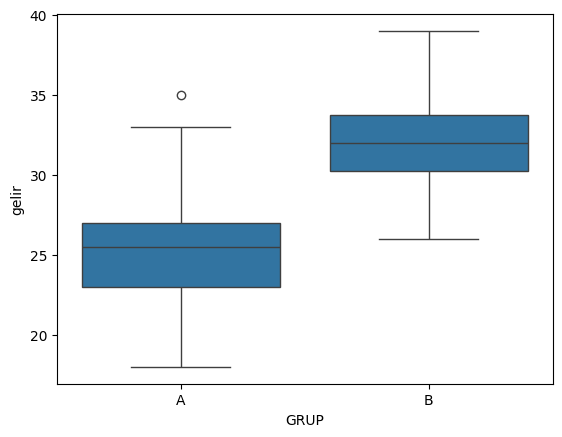

In [5]:
import seaborn as sns
sns.boxplot(x="GRUP", y="gelir", data=AB)

Evet grafikte görüldüğü gibi bir farklılık var ama bu farkın anlamlı olup olmadığını bilmiyoruz, şans eseri oluşup oluşmadığını bilmiyoruz. Bu yüzden bağımsız iki örneklem t testini uygulayacağız.

In [6]:
# Normallik varsayimi

In [7]:
A_B.head() 

,A,B
0,30,37
1,27,39
2,21,31
3,27,31
4,29,34


In [8]:
AB.head()

,gelir,GRUP
0,30,A
1,27,A
2,21,A
3,27,A
4,29,A


In [10]:
from scipy.stats import shapiro 

In [11]:
shapiro(A_B.A) # shapiro fonksiyonu bizden sadece degerleri istiyor. Bundan dolayi ikinci veri tipini kullanmamaliyiz. Aslinda ikinci tipi de kullanabiliriz fakat her grubu 
# kendi icinde degerlendirmek daha dogru sonuclar verir.
# Burada H0 hipotezini reddedemedik. Yani A grubu normal dagilmistir.

ShapiroResult(statistic=0.97892437099949, pvalue=0.7962848069993307)

In [12]:
shapiro(A_B.B) # Burda da ayni islem yapilir. Iki grup da normal dagildigi icin 1. varsayimimiz saglanmistir.

ShapiroResult(statistic=0.9561261367393356, pvalue=0.2458439374473953)

In [13]:
# Varyans homojenligi varsayimi

H0: Varyanslar Homojendir

H1: Varyanslar Homojen Değildir

In [18]:
from scipy import stats # SciPy genel kutuphanedir. stats ise onun icindeki moduldur.
stats.levene(A_B.A, A_B.B)

LeveneResult(statistic=1.1101802757158004, pvalue=0.2964124900636569)

Burda H0'ı reddedemeyiz yani 'Varyanslar homojendir' varsayımımız sağlanmıştır.

Verimizi hazırladık, varsayım testlerimizi gerçekleştirdik. Her şey hazır.

### Hipotez Testi

In [19]:
stats.ttest_ind(A_B['A'], A_B['B'], equal_var=True)

TtestResult(statistic=-7.028690967745927, pvalue=2.6233215605475075e-09, df=58.0)

P value değeri 0.05 ten küçüktür. Bu iki grup birbirinden anlamlı şekilde farklıdır. 'İki grup arasında anlamlı bir fark yoktur' diyen H0 hipotezini reddederiz.

# Nonparametrik Bağımsız İki Örneklem Testi

Diyelim ki, normallik veya varyans homojenliği varsayımları sağlanmaz ise nonparametrik bağımsız iki örneklem testi kullanılır.

In [20]:
stats.mannwhitneyu(A_B.A, A_B.B)

MannwhitneyuResult(statistic=89.5, pvalue=9.557950378612535e-08)

Bu işlemde de bu iki grup arasında anlamlı bir faklılık olduğunu görmüş olduk.